# 군집화(Clustering)

- 데이터 포인트들을 **별개의 군집으로 그룹화**하는 것
- **유사성이 높은 데이터들을 동일한 그룹으로 분류**, 서로 다른 군집들이 상이성을 가지도록 그룹화

* 군집화 활용 분야
  - 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
  - 이미지 검출, 세분화, 트랙킹
  - 이상검출(Anomaly Detection)

* 군집화 알고리즘
  - K-Means
  - Mean shift
  - Gaussian Mixture Model
  - DBSCAN

## K-Means
- **군집 중심점(Centroid)** 기반 클러스터링

### K-Means 절차
1. 군집 중심점의 개수 n을 지정
2. 원본 데이터에 랜덤하게 군집 중심점 n개를 설정한다.
3. 각 데이터들은 가장 가까운 중심점에 소속된다.
4. 중심점에 할당된 데이터들의 평균 중심으로 중심점이 이동한다.
5. 이동한 중심점을 기준으로, 각 데이터들은 가장 가까운 중심점에 소속된다.
6. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점이 이동한다.
7. 만약 중심점을 이동하였으나 데이터들의 중심점 소속 변경이 없다면 군집화가 완료된다.

### K-Means의 장점
- 일반적인 군집화에서 가장 많이 사용되는 알고리즘
- 거리 기반 알고리즘을 사용하기 때문에 알아보기 쉽고 간결하다.
- 대용량 데이터에도 활용이 가능하다.

### K-Means의 단점
- 거리 기반 알고리즘으로 데이터의 속성(피처)의 개수가 매우 많을 경우 군집화 정확도가 떨어지게 된다.
  - 이를 방지하기 위해 PCA로 피처 데이터에 차원 축소를 적용해야 할 수도 있다.
- 데이터를 중심점에 소속하고 중심점이 이동하는 것이 반복되는데, 반복 횟수가 많은 경우 수행시간이 느려진다.
- 이상치 데이터에 매우 취약하다.
  - 이상치 데이터의 영향으로 군집 중심점이 엄청나게 큰 폭으로 이동될 수 있다.

### 사이킷런의 `KMeans` 클래스
사이킷런의 서브패키지 `cluster` 에서 `KMeans` 클래스를 제공

```python
from sklearn.cluster import KMeans

KMeans(
  n_clusters=8,
  init='k-means++',
  n_init=10,
  max_iter=300,
  tol=0.0001,
  precompute_distances='auto',
  verbose=0,
  random_state=None,
  copy_x=True,
  n_jobs=1,
  algorithm='auto'
)
```

- `n_clusters` : 군집의 개수. 군집 중심점의 개수 지정
  - 가장 중요한 파라미터
- `max_iter` : 중심점 이동의 최대 반복 횟수. 지정한 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
- `labels_` : 각 데이터 포인트가 속한 군집 중심점 레이블
- `cluster_centers_` 각 군집 중심점의 좌표
  - Shape는 `[군집개수, 피처개수]`
  - 이를 이용해 군집 중심점 좌표가 어디인지 시각화 가능
- `n_clusters`, `max_iter` 파라미터를 주로 지정하고 나머지는 기본 옵션을 주로 사용한다.

## K-Means 실습
- 사이킷런의 붗꽃 데이터셋 이용

In [22]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 피처 데이터의 이름 확인
print('feature name:', feature_names)

# 타겟(결정 값)의 클래스명 확인
print('target name:', target_names)

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [24]:
from sklearn.cluster import KMeans

## 클러스터(군집화) 개수 지정
# 위에서 붗꽃 데이터 셋의 클래스가 3개인 것을 알고 있기 때문에 n_clusters=3으로 미리 지정
# 클래스 개수를 미리 파악하여 클러스터의 개수를 지정하는 것이 좋다.
n_clusters = 3

## KMeans 클래스 객체 생성
kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=0)

## 훈련 - 데이터 입력
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

### `KMeans`의 속성(Property) 확인
- 훈련이 끝난 `KMeans`의 군집 객체(`kmeans`)에서 클러스터를 확인할 수 있다.
- `labels_` : 훈련된(`fit`) 데이터에 대한 군집 레이블 확인
  - 지도학습에서 사용하는 label과 다른 개념이다.
  - 랜덤하게 `label`이 부여되기 때문에 사람이 해석해야 한다.

In [25]:
## kmeans의 속성 확인
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [26]:
## 예측 - 원본 데이터인 붗꽃 데이터 포인터들이 어떤 클러스터 레이블에 속하는지 예측한다.
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [27]:
# fit_predict() 는 fit(), predict()를 동시에 수행해주기 때문에, 위와 같은 결과로 예측된다
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [28]:
## 군집상의 좌표값 확인
kmeans.transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

- 동일한 클러스터는 비슷한 좌표값을 가지고, 다른 클러스터는 아주 다른 좌표값을 가지는 것을 확인할 수 있다.

In [29]:
## 실제 타겟과 군집의 차이를 비교
target, kmeans.labels_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

In [30]:
## 시각화
# 실제 타겟과 군집의 레이블 비교
irisDF['target'] = target
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [31]:
# 타겟과 클러스터의 개수를 각각 확인 - groupby(), count() 사용
irisDF.groupby(["target", "cluster"]).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

- 타겟에 대해 0번 클래스는 모두 1번 클러스터로 되어 있기 때문에, 군집이 아주 잘 되었다고 볼 수 있다.
- 1번 클래스, 2번 클래스는 0번과 2번 두 가지 클러스터가 섞여있기 때문에, 군집을 하는데 어려움이 있다고 볼 수 있다.
  - 1번 클래스는 0번 클러스터 48개, 2번 클러스터 2개
  - 2번 클래스는 0번 클러스터 14개, 2번 클러스터 36개

- 위 결과는 시각화를 통해 좀 더 결과를 쉽게 확인할 수 있다.

### PCA를 통해 데이터 차원 축소 후 시각화 확인

In [32]:
## PCA를 통해 데이터 차원축소 후 시각화
from sklearn.decomposition import PCA

# 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

# 2차원으로 차원 축소한 데이터를 DataFrame에 추가
irisDF["c1"] = pca_transformed[:, 0] # 전체 행, 첫 번째 열
irisDF["c2"] = pca_transformed[:, 1] # 전체 행, 두 번째 열

# 2차원에서 시각화한 데이터프레임 확인하기
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,c1,c2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


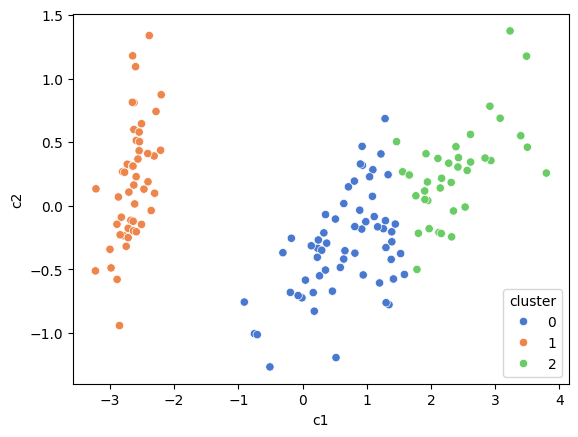

In [33]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 각 컴포넌트 별 군집을 시각화하여 확인
sns.scatterplot(
    x = "c1",
    y = "c2",
    hue = "cluster",
    palette = 'muted',
    data=irisDF
)

plt.show()

- 자신만의 클러스터 영역을 가지고 있는 것을 확인할 수 있다.

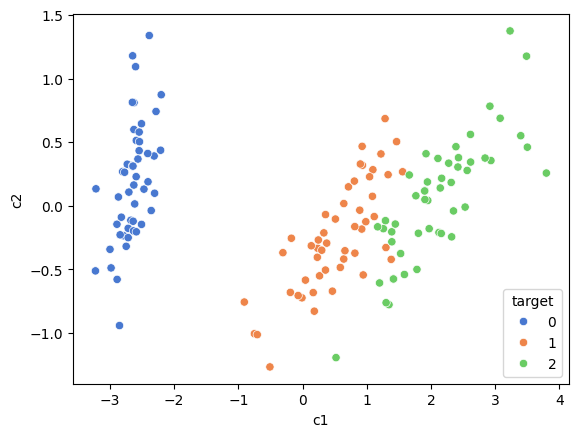

In [34]:
import seaborn as sns

# 각 컴포넌트 별 타겟 확인
sns.scatterplot(
    x = "c1",
    y = "c2",
    hue="target",
    palette='muted',
    data=irisDF
)
plt.show()

- 군집을 시각화한 것과 비교했을 때 타겟이 좀 더 섞여 있는 것을 확인할 수 있다.

## K-Means 실습
- `make_blobs`를 이용하여 임의의 데이터 세트의 군집 확인

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* `n_samples` : 생성할 총 데이터의 개수. Default는 100


* `n_features`: 데이터의 피처 개수.
  - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현


* `centers`
  - int 형태로 표현할 경우 군집의 개수를 의미
  - ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미


* `cluster_std`
  - float 형태로 표현할 경우 생성될 군집 데이터의 표준 편차
    - `cluster_std=0.8` : 군집 내에서 데이 터가 표준편차 0.8을 가진 값으로 생성
  - flaot 값을 요소로 가진 ndarray 형태로 표현할 경우 군집별 표준 편차를 의미
    - ex. `cluster_std=[0.8, 1,2, 0.6]` : 3개의 군집에서 첫 번째 군집 내
  데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 생성
    - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [36]:
# 판다스 데이터프레임으로 정리
import pandas as pd

clusterDF = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


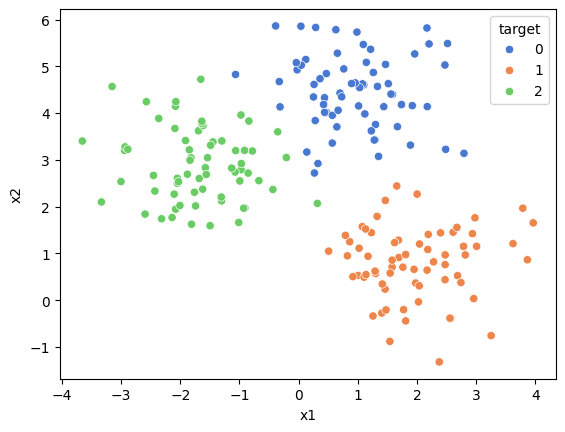

In [37]:
# 실제 타겟 데이터에 대한 시각화
sns.scatterplot(
    x = "x1",
    y = "x2",
    hue = "target",
    palette = 'muted',
    data=clusterDF
)

plt.show()

In [38]:
## Kmeans 이용해 클러스터 확인
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [39]:
# 클러스터 레이블을 데이터프레임에 추가
clusterDF['cluster'] = cluster_labels

clusterDF.head()

,x1,x2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


In [40]:
## 군집 중심점(centroid) 좌표 확인
# 군집 중심점은 군집의 대표적인 특성을 나타내는 메인 좌표로로 볼 수 있다.
# 데이터가 centroid에 가까울 수록 군집의 핵심적인 특성을 가진다고 볼 수 있고, 멀어질 수록 해당 특성에서 점점 멀어진다고 볼 수 있다.
centers = kmeans.cluster_centers_
centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

- 좌측은 `x1`에 대한, 우측은 `x2`에 대한 군집 중심점 좌표이다.

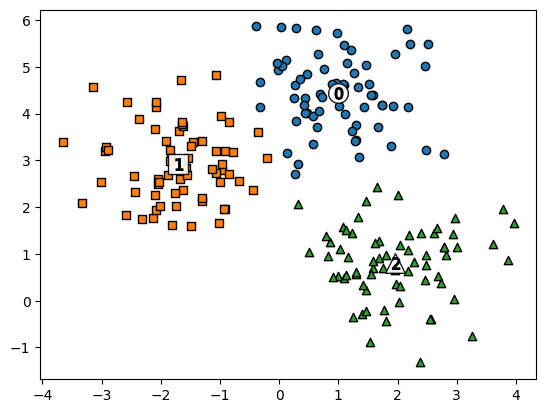

In [41]:
# 군집 중심점 시각화
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['cluster']==label]
    plt.scatter(x=label_cluster['x1'], y=label_cluster['x2'], edgecolor='k',
                marker=markers[label] )

    center_x_y = centers[label]

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

## Mean Shift
- KDE(Kernel Density Estimation)을 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
  - KDE : 확률 밀도 추정방법
- 별도의 군집화 개수를 지정하지 않고, 데이터 분포도에 기반하여 자동으로 군집화 개수를 정한다.
- Bandwidth의 크기에 따라 군집을 수행

### Mean Shift 수행절차
특정 데이터가 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동할 때, 주변 데이터들과의 거리 값을 커널 함수로 입력한 뒤 그 반환값을 현재 위치에서 갱신하면서 이동한다.

1. 원본데이터에 대해 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 계산
2. 데이터 분포도가 높은 방향으로 중심점 이동
3. 이동된 데이터에서 다시 반경 내의 데이터 분포 계산

### KDE(Kernel Density Estimation)
- 커널(Kernel) 함수를 통해 어떤 확률 변수의 **확률 밀도 함수(PDF)를 추정**하는 방식
- 개별 관측 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나누어서 확률 밀도 함수를 추정
- 대표적인 커널함수로 가우시안 분포함수가 사용됨
- 확률밀도함수(PDF : Probability Density Function) : 확률 변수의 분포를 나타내는 함수
  - 대표적으로 정규 분포, 감마 분포, t-분포 등
  - 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알 수 있다.
  - 즉, 확률 밀도 함수를 통해 변수의 특성(ex.정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.
- KDE는 확률 밀도를 추정하기 위해 비모수적 추정을 한다.

### 확률 밀도 추정 방법
1. 모수적(Parametic) 추정
  - **데이터가 특정 데이터 분포**(ex.가우시안 분포)**를 따른다는 가정 하에 데이터 분포를 찾는 방법**
  - Gaussian Mixutre
2. 비모수적(Non-Parametic) 추정
  - **데이터가 특정 분포를 따르지 않는다는 가정 하에서 밀도를 추정**하는 방법
  - 관측된 데이터 만으로 확률 밀도를 찾는 방법
  - KDE
  - Histogram

### [참고]비모수적 밀도 추정 - Histogram
- 히스토그램은 데이터의 등장 빈도 수를 구할 때 많이 사용
- 도수분포표에서 연속된 수치를 일정한 간격으로 자른 Bin(구간)이 존재
- 히스토그램 밀도 추정 문제점
  - Bin의 경계에서 함수의 불연속성이 나타난다.(곡선이 부드럽지 않고 끊어져 있는 형태)
  - Bin의 크기에 따라 히스토그램이 달라진다.

### KDE와 가우시안 커널함수
$$
KDE = \frac{1}{n} \sum_{i=1}^N K_h (x - x_i) = \frac{1}{nh} \sum_{i=1}^N K_h (\frac{x - x_i}{h})
$$

> - $K$ : 커널함수, $x$ : random값, $x_i$ : 관측값, $h$ : bandwidth(분산 관련)

### Bandwidth에 따른 KDE의 변화
- Bandwidth($h$) 값이 작은 경우
  - 좁고 뾰족한 KDE로 변동성이 큰 확률 밀도 함수를 추정
  - 과대적합일 확률이 높음
  - Mean Shift는 Bandwidth가 작을 수록 많은 수의 군집 중심점(centroid)을 가진다.
  - 생성되는 군집의 개수가 많다.
- Bandwidth($h$) 값이 큰 경우
  - 과도하게 부드러운 KDE로 단순화된 확률 밀도 함수를 추정
  - 과소적합일 확률이 높음
  - Mean Shift는 Bandwidth가 클 수록 적은 수의 군집 중심점(centroid)을 가진다.
  - 생성되는 군집의 개수가 작다.


### 사이킷런의 `MeanShift`
- 사이킷런에서 Mean Shift 군집화를 위해 `Meanshift` 클래스 제공
- `bandwidth`
  - 밀도 중심으로 이동할 때 사용되는 커널 함수의 bandwidth
  - 가장 중요한 초기화 파라미터
  - 군집화 성능에 큰 영향
- 사이킷런은 최적의 `bandwidth`계산을 위해 `estimate_bandwidth()` 함수를 제공

## Mean Shift 실습

### 1. Mean Shift 원리를 시각화로 확인

<Axes: ylabel='Density'>

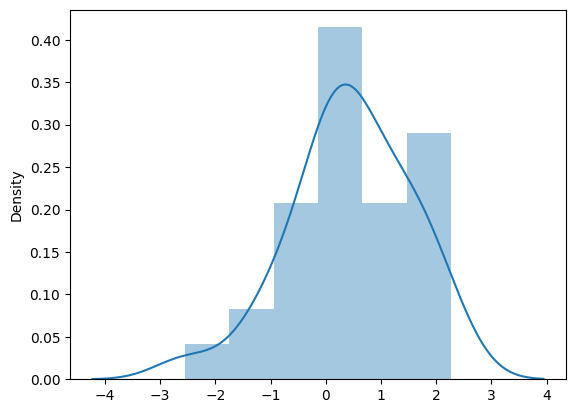

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 30개 랜덤 데이터를 정규분포로 생성함

## distplot 이용해서 시각화
sns.distplot(x)

<Axes: ylabel='Density'>

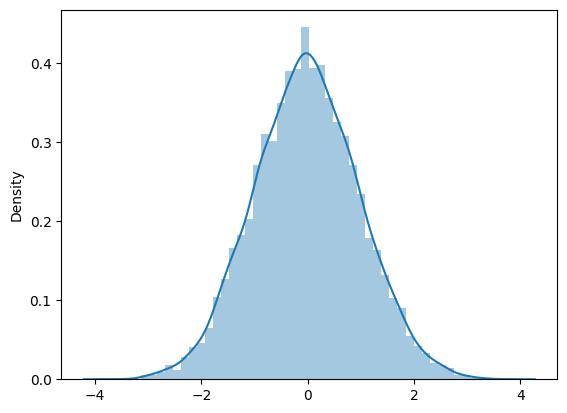

In [43]:
# 10000개 랜덤 데이터를 정규분포로 생성할 경우 그래프 시각화 확인

np.random.seed(0)
sample = np.random.normal(0, 1, size=10000)

## distplot 이용해서 시각화
sns.distplot(sample)

- 데이터의 수가 많아질 수록 정규분포 그래프와 유사해지는 것을 확인할 수 있다.

<Axes: ylabel='Density'>

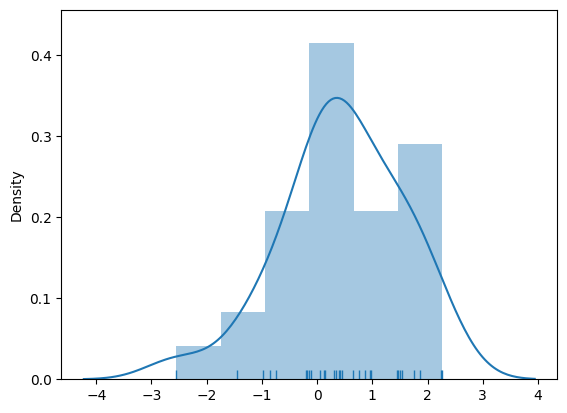

In [44]:
## rug 옵션을 이용해서 데이터 밀집 상황 확인
# 그래프 아래 짧은 선들로 밀도 체크
sns.distplot(x, rug=True)

-  그래프 아래 짧은 선들로 데이터의 밀집도 확인할 수 있다.


### 각각의 데이터 분포를 더하기
- 함수를 더하는 것을 적분이라고 한다.
- 각 데이터에 대한 정규분포를 생성 후, 밀집도(bandwidth)에 따라 적분하는 것

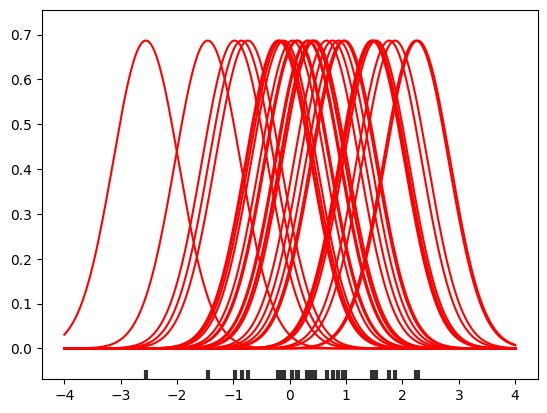

In [45]:
## 각 데이터에 대한 정규 분포 생성 후 시각화로 확인

from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

- 각각의 데이터에 대한 대표값을 나타낸다.
- bandwidth를 기준으로 그래프들이 몰려있는 부분을 골라 적분하게 된다.

In [46]:
len(kernels), len(kernels[0])

(30, 200)

- 30개의 커널함수 그래프는 각각 200개의 원소로 이루어진 것을 확인

In [47]:
from scipy.integrate import trapz # 각 구간 별 y에 대한 적분

density = np.sum(kernels, axis=0)
density.shape

(200,)

- 적분을 통해 그래프의 200개의 원소를 30번 더한다.

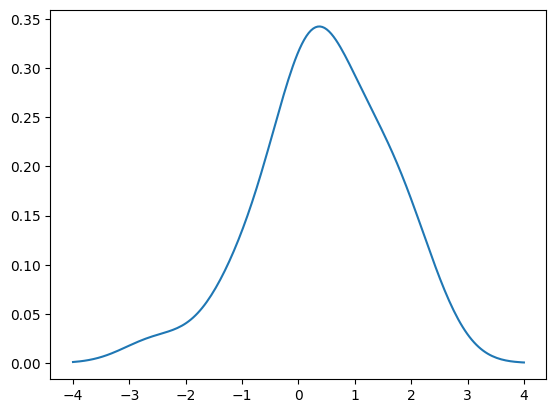

In [48]:
density /= trapz(density, support)
plt.plot(support, density)

In [49]:
## 적분값 계산
trapz(density, support)

0.9999999999999999

- 그래프 값들을 단순히 더했을 때, 적분으로 나타내면 그래프 안의 면적을 계산

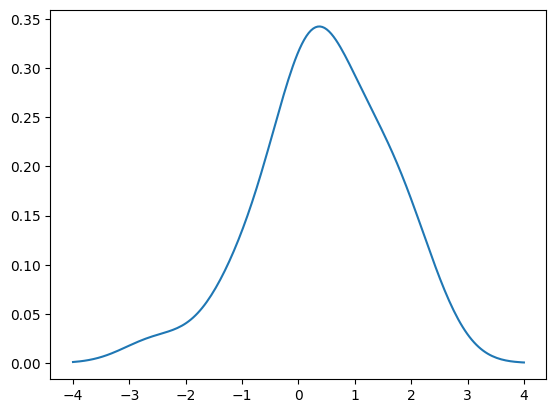

In [50]:
## 밀도 계산
density /= trapz(density, support)
plt.plot(support, density)

- 평균적인 적분값에서 실제 밀도값을 나누어주면 평균 밀도가 나오게 된다.
- 실제 적분값으로 나눠서 밀도를 구한 것

<Axes: ylabel='Density'>

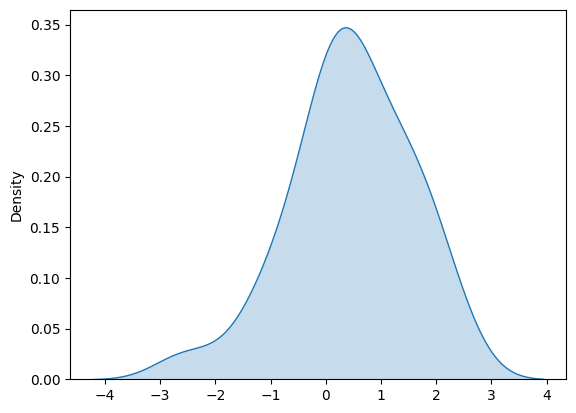

In [51]:
 ## kdeplot을 이용해 각각의 구간(데이터의 개수)들을 적분해서 밀도를 한번에 확인할 수도 있다.
 sns.kdeplot(x, shade=True)

- bandwidth를 지정하지 않았기 때문에 데이터의 모든 분포가 합쳐진 상태로 나옴

[]

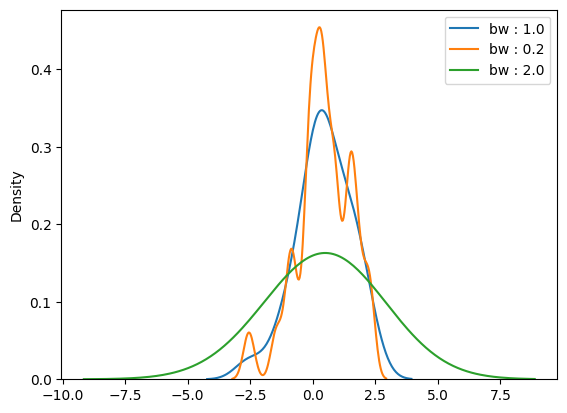

In [52]:
## kdeplot를 이용해 seaborn에 bandwidth까지 바로 적용해 비교할 수 있다.
sns.kdeplot(x, label="bw : 1.0")
sns.kdeplot(x, bw=0.2, label="bw : 0.2")
sns.kdeplot(x, bw=2, label="bw : 2.0")
plt.legend()
plt.plot()

- bandwidth에 따라 데이터들이 어떻게 합쳐지는지(적분되는지) 확인할 수 있다.
- bandwidth가 작아질 수록 좁아지는 그래프 확인 / 군집의 개수 많아짐
- bandwidth가 클수록 넓어지는 그래프 확인 / 군집의 개수 적어짐

### 2. 사이킷런의 `MeanShift` 실습
- 사이킷런에서 제공하는 `make_blobs` 데이터 셋 이용

In [53]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [54]:
## bandwidth를 0.9로 지정할 경우
from sklearn.cluster import MeanShift

# Meanshift 객체 생성
meanshift = MeanShift(bandwidth=0.9)

# 학습 및 예측
cluster_labels = meanshift.fit_predict(X)

# 클러스터 유형 확인
print(f'클러스터의 유형 : {np.unique(cluster_labels)}')

클러스터의 유형 : [0 1 2 3 4 5 6 7]


- 8개의 군집이 만들어진 것을 확인

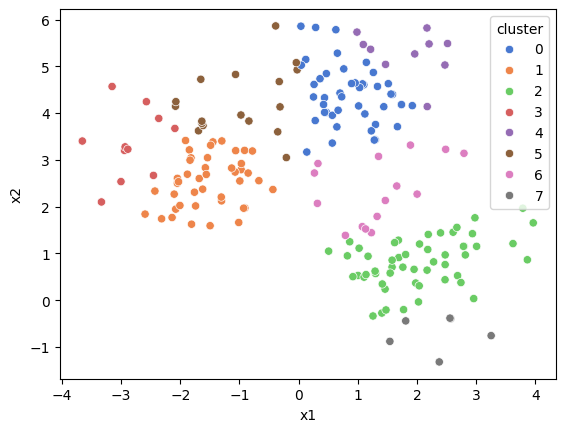

In [55]:
# 시각화
import pandas as pd

sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

- 현재 bandwidth 값이 작기 떄문에, 8개의 군집이 오밀조밀하게 모여 만들어진 것을 확인

In [56]:
## bandwidth를 1로 지정할 경우(수치 증가)

# Meanshift 객체 생성
meanshift = MeanShift(bandwidth=1.0)

# 학습 및 예측
cluster_labels = meanshift.fit_predict(X)

# 클러스터 유형 확인
print(f'클러스터의 유형 : {np.unique(cluster_labels)}')

클러스터의 유형 : [0 1 2]


- bandwidth 수치가 살짝 증가했는데 군집의 개수가 8개에서 3개로 줄어든 것을 확인
- `MeanShift`로 군집을 만들 때, bandwidth 수치에 예민한 것을 확인할 수 있다.

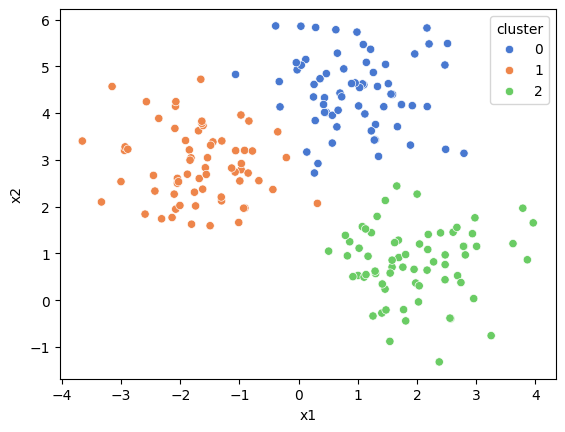

In [57]:
# 시각화
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

- `bandwidth=0.9` 보다 `bandwidth=1.0`에서 군집이 잘 만들어진 것을 시각화로 확인

In [58]:
## estimate_bandwidth() 함수를 이용해 최적의 bandwidth 수치 찾기
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25) # quantile 사분위를 지정 - 정규분포를 생각해서 0.25로 보통 지정하면 된다.
best_bandwidth

1.6889636737559222

In [59]:
# 최적의 bandwidth로 군집 객체 생성
meanshift = MeanShift(bandwidth=best_bandwidth)

# 학습 및 예측
cluster_labels = meanshift.fit_predict(X)

# 클러스터 유형 확인
print(f'클러스터의 유형 : {np.unique(cluster_labels)}')

클러스터의 유형 : [0 1 2]


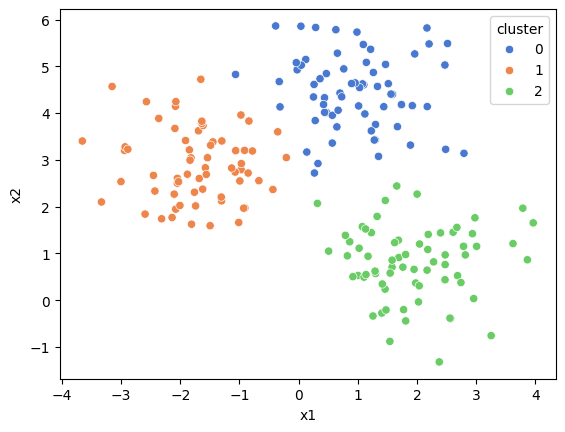

In [60]:
# 시각화
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

- `bandwidth=1.0`로 지정했을 때도 충분히 군집이 잘 만들어졌지만, 최적의 bandwidth를 구해서 군집 수행하여 시각화로 확인해 보았다.
- 가운데 주황색 데이터 포인트 하나가 연두색으로 변했다.

In [61]:
## MeanShift에서 centroid(군집 중심점) 확인
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

- `cluster_centers_`로 각 클러스터별 centroid 좌표를 확인할 수 있다.

## GMM(Gaussian Mixutre Model)

### 거리 기반 K-Means의 문제점
- K-Means는 특정 중심점을 기반으로 거리적으로 퍼져있는 데이터 세트에 군집화를 적용하면 효율적이지만, 이러한 데이터 분포를 가지지 않는 데이터 세트에는 효율적인 군집화가 어렵다.
  - ex. 데이터들의 진행방향(분산 방향)이 확실한 경우

### GMM의 개요
- GMM과 K-Means의 공통점
  - GMM 군집화도 K-Means 처럼 n_component(**클러스터의 총 개수**, GMM의 정규분포의 총 개수를 의미)**를 미리 정하고 시작**한다.

- GMM과 K-Means의 차이점 : **모수 추정 방식**
  - K-Means는 비모수 추정 방식으로, 데이터의 확률 밀도 함수를 추정
  - GMM 군집화는 군집화를 적용하고자 하는 **데이터가 여러 개의 다른 가우시안 분포(Gaussian Distribution)를 가지는 모델로 가정하고 군집화를 수행**
  - 1000개의 데이터 세트가 있다면 이를 구성하는 여러개의 정규 분포 곡선을 추축 $\rightarrow$ 개별 데이터가 각 정규 분포에 속하는 확률을 구하여 어떤 정규 분포에 속하는지 결정하는 방식
  - 정규분포를 추정하지 않고, 미리 정규 분포를 만들어 놓고 데이터가 어떤 정규 분포에 속하는지 확인하는 것

### GMM 모수(Parameter) 추정
- GMM 모수 추정은 개별 정규 분포들의 평균, 분산, **데이터가 특정 정규 분포에 해당될 확률**을 추정

- GMM 모수 추정을 위한 EM(Expectation and Maximization)

* **Expectation**
  - 기대
  1. 최초에 데이터들을 임의로 특정 정규 분포로 소속시킨 후
  2. 개별 데이터 각각에 대해서 특정 정규 분포에 소속될 확률을 구한다.
  3. 가장 높은 확률을 가진 정규 분포에 데이터를 소속

* **Maximization**
  - 확률이 높은 정규분포로 소속될 가능성을 최대화
  1. 데이터들이 특정 정규분포로 소속되면 다시 해당 정규 분포의 평균과 분산을 구한다.
  2. 해당 데이터가 발견될 수 있는 가능도를 최대화(Maximum likelihood)할 수 있도록 모수인 평균과 분산를 구한다.

- 개별 정규분포의 모수인 평균과 분산이 더 이상 변경되지 않고 개별 데이터들의 이진 정규분포 소속이 더 이상 변경되지 않으면 그것으로 최종 군집화를 결정
- 그렇지 않으면 Expectation과 Maximization을 반복


### 사이킷런의 `GaussianMixture`
- 사이킷런은 GMM 군집화를 위해 `GaussianMixture` 클래스를 제공

```python
from sklearn.mixture import GaussianMixture
```

- `n_componetns`: Mixture Model의 개수, 즉 군집화 개수, 정규분포 개수 의미
  - 주요 생성자 파라미터


## GMM 실습
- 사이킷런의 붗꽃 데이터 세트 이용

In [62]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [63]:
from sklearn.mixture import GaussianMixture

# n_componets=3 일 경우 - 클래스의 개수로 지정
gmm = GaussianMixture(n_components=3, random_state=0)

gmm_cluster_labels = gmm.fit_predict(iris.data)

iris_df["gmm_cluster"] = gmm_cluster_labels
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [64]:
# 클러스터가 잘 만들어졌는지 타겟과 클러스터를 같이 비교 - groupby() 이용
iris_df.groupby(['target'])['gmm_cluster'].value_counts().to_frame()

gmm_cluster
target gmm_cluster             
0      0                     50
1      2                     45
       1                      5
2      1                     50

- 타겟에 대한 0번, 2번 클래스는 군집을 잘 수행했고, 1번 클래스에 대해서만 약간 혼잡하게 군집된 것을 확인할 수 있다.
- 원래의 타겟을 잘 반영한 편이라고 볼 수 있다.
- **GMM은 클래스의 개수를 미리 알고 있을 경우 군집의 성능이 좋은 편이다.**
- 붗꽃 데이터 세트는 K-Means보다 분산의 방향을 신경써야 하는 GMM이 더 어울릴 수 있다고 볼 수 있다.

## K-Means와 GMM 시각화로 비교
- 사이킷런의 `make_blobs` 데이터셋 이용
- 똑같이 `n_clusters=3`일 때 군집 비교
- 서로의 관계가 없는 것 같은 데이터의 군집은 K-Means가 나을 수 있다.
- 분산 방향이 확실한 데이터 군집은 GMM이 나을 수 있다.

In [65]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [66]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341],
                  [-0.40887718, 0.85253229]]

X_aniso = np.dot(X, transformation)

# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

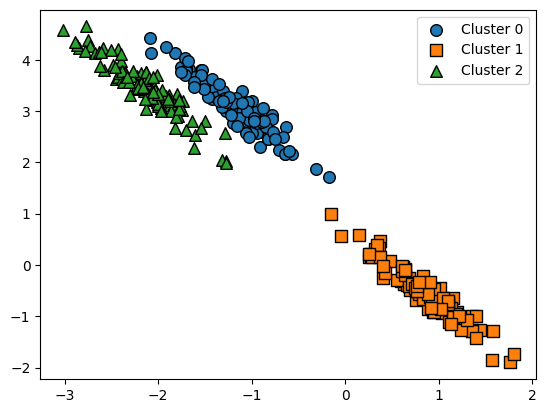

In [67]:
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 확실한 분산의 방향성이 보이는 데이터들을 시각화로 확인

### 3개의 Cluster 기반 Kmeans

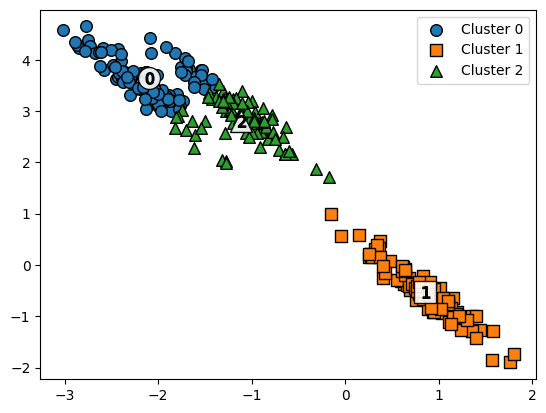

In [68]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

- K-Means는 centroid(군집 중심점) 중심으로 원형의 범위로 군집화를 수행하는 것을 시각화로 확인
- 확실한 분산 방향을 보이는 데이터에서는 K-Means는 제대로 군집을 수행하지 못 할 수 있다고 볼 수 있다.

### 3개의 Cluster 기반 GMM

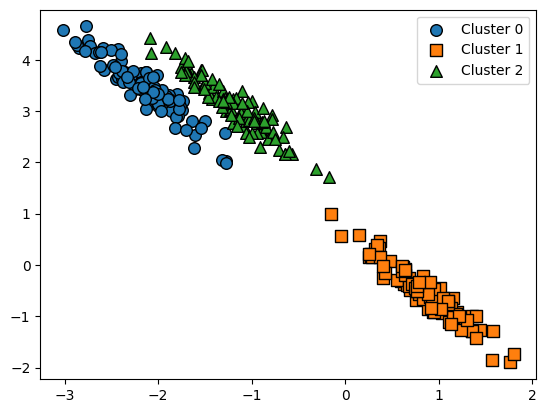

In [69]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- K-Means보다 GMM이 해당 데이터에 대한 군집을 더 잘 수행하고 있는 것을 시각화로 확인 가능

## DBSCAN
- Denstiy Based Spatial Clustering of Applications with Noise
- 특정 공간(EPS) 내에 데이터 밀도 차이를 기반으로 하는 알고리즘
- 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행할 수 있음

### MeanShift와 DBSCAN의 공통점
- 데이터의 밀도를 이용해 군집화 수행
- 알고리즘이 데이터 밀도 차이를 자동으로 감지하여 군집을 생성
  - 사용자가 따로 군집의 개수를 지정 X

### MeanShift와 DBSCAN의 차이점
- Mean Shift는 PDF(확률 밀도 함수)를 추정하여 확률을 기반으로 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화 수행
- DBSCAN은 특정 공간 내 데이터의 개수를 기준으로 군집화 수행

### DBSCAN이 적절하지 않은 데이터
- 데이터의 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 군집화 성능이 떨어지게 된다.
- 피처의 개수가 많으면 군집화 성능이 떨어지게 된다.

### DBSCAN 주요 구성 요소
- 입실론(`epsilon`) 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(`min_points`) : 개별 데이터의 입실론 주변 영역에 포함되는 다른 데이터의 개수
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키면 군집화를 수행한다.
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수 충족 여부에 따라 데이터 포인트가 다음과 같이 정의됨
  - 핵심 포인트(Core Point) : 주변 영역 내 최소 데이터 개수 이상의 타 데이터(이웃 포인트)를 가지고 있을 경우 해당 데이터
    - 군집을 만들 수 있는 조건을 모두 갖춘 데이터 포인트
  - 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터
  - 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃포인트로 가지는 데이터
    - 군지브이 경계면에 존재하는 데이터 포인트
  - 잡음 포인트(Noise Point) : 주변 영역 내 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않고, 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터
    - 경계 포인트, 입실론 주변영역 밖에 존재하는 데이터 포인트

### DBSCAN 절차
1. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 지정(자기 자신 포함)
2. P1 데이터포인트가 반경 내 최소 데이터 세트 개수를 만족하면 핵심 포인트가 된다.
3. P1의 이웃 포인트인 P2도 조건을 만족하면 핵심포인트가 된다.
4. P2가 P1의 이웃 데이터이며 핵심포인트기 때문에 P1에서 P2로 연결해 직접 접근이 가능
5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심포인트를 서로 연결하면서 군집화를 구성하고 점차적으로 군집 영역을 확장

### 사이킷런의 DBSCAN
- 사이킷런은 `DBSCAN` 클래스를 통해 dBSCAN 알고리즘 지원

```python
from sklearn.cluster import DBSCAN
```

- 주요 하이퍼 파라미터
  - `eps` : 입실론 주변 영역의 반경
  - `min_samples` : 핵심 포인트가 되기 위해 입실론 주변 영역 내 포함되어야 할 데이터의 최소 개수
    - 자기 자신의 데이터를 포함해서 반경 내 포함되는 데이터의 개수는 `min_samples + 1`이 된다.

## DBSCAN 실습
- 사이킷런의 붗꽃 데이터 셋 이용

In [71]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.6,
    min_samples=8,
    metric='euclidean' # 유클리드 거리 의미 - L2 놈을 이용해 데이트 포인트 간의 거리를 구한다.
)

# 학습 및 예측
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [76]:
# 클러스터가 잘 만들어졌는지 타겟과 클러스터를 같이 비교 - groupby() 이용
iris_df.groupby(["target"])['dbscan_cluster'].value_counts().to_frame()

dbscan_cluster
target dbscan_cluster                
0       0                          49
       -1                           1
1       1                          46
       -1                           4
2       1                          42
       -1                           8

- dbscan_cluster에서 -1는 아웃라이어(이상치)로 판단되는 데이터 포인트를 의미
- DBSCAN으로 군집화 수행시 이상치를 제외한 클러스터의 레이블 0, 레이블 1로 두 개의 레이블이 생성된다.
- 클래스 1, 클래스 2이 기존에 혼잡하게 섞여있던 것을 확인할 수 있었는데, 이를 하나의 군집으로 판단한 것을 확인할 수 있다.

### 시각화로 군집 확인
- 4차원 피처 데이터로 군집을 수행했어도, 시각화를 위해서 2차원으로 차원 축소를 진행한다.

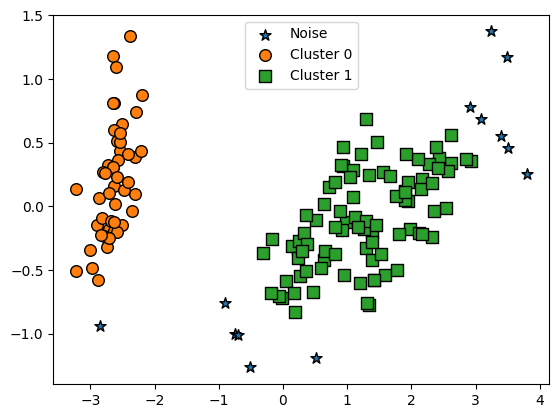

In [77]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

### eps가 증가할 경우
- eps를 0.6에서 0.8로 증가하고 확인

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


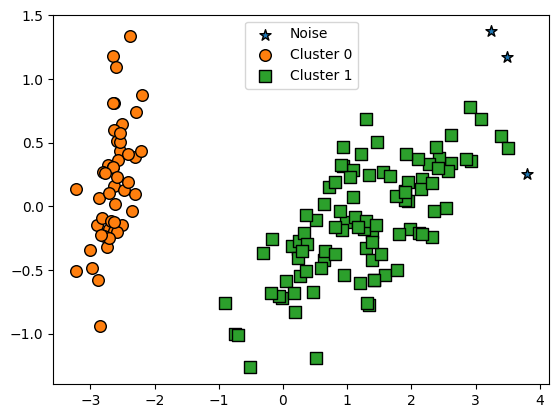

In [78]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

- `eps=0.6`일 때보다 노이즈 포인트가 감소한 것을 확인할 수 있다.

### min_samples 증가할 경우
- min_samples가 8에서 16로 증가할 때 결과를 확인

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


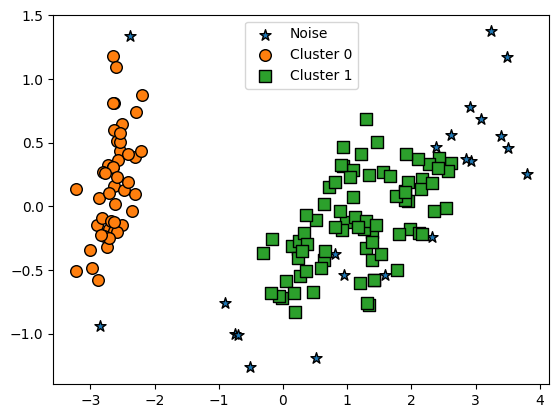

In [79]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

- min_samples가 증가할 경우 이전 보다 노이즈가 많아졌고, 군집 내에서도 아웃라이어가 확인된다.

### eps, min_samples 둘 다 감소할 경우

target  dbscan_cluster
0        0                47
        -1                 3
1        1                39
        -1                 4
         2                 4
         3                 3
2        3                35
        -1                15
Name: dbscan_cluster, dtype: int64


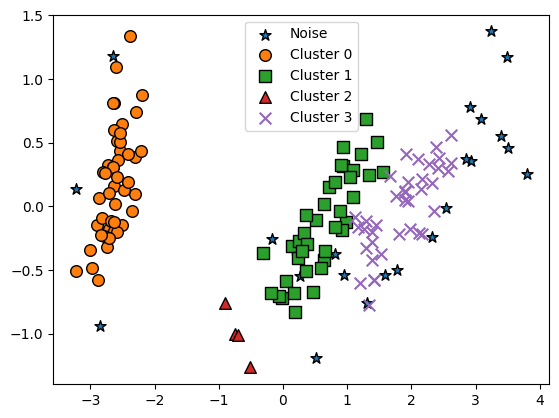

In [81]:
dbscan = DBSCAN(eps=0.4, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

- 클러스터 레이블이 2개 추가된 것을 확인
- 다른 알고리즘에 비해 DBSCAN은 파라미터에 대해 예민하고 파라미터를 조정하기 까다로운 편이다.

## 군집화 성능 평가 - 실루엣 분석

### 군집 알고리즘을 잘하는 기준
- 군집에는 평가지표가 존재하기는 하지만 절대적이지는 않다.
- 결과적으로 군집의 평가지표가 높은 것 보다 데이터 분석 목적에 부합하는 군집이 만들어지는 것이 좋다.
- 시각화 및 EDA를 통해 군집별로 군집에 포함된 데이터의 특징을 파악해야 한다.
- 군집에 포함된 데이터가 이상하다고 판단되면, 하이퍼 파라미터 값을 수정하면서 원하는 군집이 만들어질 때까지 반복하여 수정이 필요하다.
- 군집은 머신러닝으로 예측하는 것보다 데이터 분석 도구로서 사용하는 편이 좋다.

### 실루엣 분석 - 군집 평가
- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타낸다.
- 개별 데이터가 가지는 군집화 지표인 실루엣 계수(Silhouette Coefficient) 기반
- 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집되어 있고, 다른 군집에 있는 데이터와 얼마나 멀리 분리되어 있는지 나타내는 지표
- 클러스터 내부 데이터 간의 거리는 짧고, 클러스터 간 데이터의 거리가 멀수록 실루엣 계수가 높고, 군집이 잘되었다고 보는 군집 평가 지표이다.

### 실루엣 계수(Silhouette Coefficient)
- 실루엣 계수는 -1에서 1 사이의 값을 가진다.
- 실루엣 계수가 1에 가까워질 수록 근처의 군집과 더 멀리 떨어져 있다는 의미
- 실루엣 계수가 0에 가까울 수록 근처의 군집과 가까워진다는 의미
- 실루엣 계수가 음수일 경우 다른 군집에 데이터 포인트가 할당 되었음을 의미. 즉, 잘못 군집된 데이터로 분석 및 조사 대상이 되는 군집 포인트인 것

$$
S_i = \frac{b_i - a_i}{max(a_i b_i)}
$$

- 클러스터 A와 클러스터 A의 특정 데이터에서 실루엣 계수를 구할 경우 가장 가까운 타 클러스터 B의 데이터 포인트를 참고해서 실루엣 계수 계산
- $a_{ij}$ : $i$번째 데이터에서 같은 클러스터(A) 내부의 다른 데이터 포인트 까지의 거리
  - $a_{12}$는 1번 데이터에서 2번 데이터 까지의 거리를 의미
- $a_i = \frac{1}{N} \sum_{j=1}^N a_{ij}$
  - $a_i$는 $i$번째 데이터에서 자신이 속한 클러스터 내의 다른 데이터 포인트들의 거리 평균
  - $N$ : 클러스터 내 기준 포인트를 제외한 다른 데이터들의 총 개수
- $b_i = \frac{1}{M} \sum_{k=1}^N a_{ik}$
  - $b_i$는 $i$번째 데이터에서 타 클러스터(B) 내의 다른 데이터 포인트들의 거리 평균
  - $M$ : 타 클러스터 내 데이터들의 총 개수
- $b_i - a_i$ : 두 군집 간의 거리가 얼마나 떨어져 있는가에 해당하는 값
- $b_i - a_i$ 값을 정규화하기 위해 $max(a_i b_i)$값으로 나눈다.



### 사이킷런 실루엣 분석 API

```python
sklearn.metrics.silhouette_samples(
  X, # 피처 데이터 세트
  labels, # 각 피처 데이터 세트가 속한 군집 레이블 값
  metric='euclidean',
  **kwargs
)
```
 - 각 데이터 포인트의 실루엣 계수를 반환한다.

```python
sklearn.metrics.silhouette_score(
  X, # 피처 데이터 세트
  labels, # 각 피처 데이터 세트가 속한 군집 레이블 값
  metric='euclidean',
  sample_size=None,
  **kwargs
)
```
- 전체 데이터의 실루엣 계수값을 평균해 반환한다.
  - `np.mean(silhoueet_samples())`와 같음


### 좋은 군집 기준
- 일반적으로 `silhouette_socre` 함수의 값이 0 ~1 사의의 값을 가질 때, 1에 가까울 수록 군집화가 어느정도 잘 됐다고 판단할 수 있다.
  - 이는 절대적이지는 않고 시각화 및 EDA를 통해 종합적으로 판단해야 한다.
- 단, 개별 군집의 실루엣 계수의 평균값과 전체 데이터의 실루엣 계수의 평균값의 편차가 크지 않아야 한다.